In [2]:
import  pandas as pd 
import  numpy as np
import seaborn
import  matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MaxAbsScaler 

Q2.1.1

In [3]:
df = pd.read_excel('bakers_yeast_reference_batches.xlsx')
batch = df.loc[:, ['BatchID', 'Time']]
batch1 = batch.groupby('BatchID').max()
batch1

,Time
BatchID,
Ma,13.6667
Na,13.6667
Ta,13.6667
Va,13.6667
Xa,13.6667
bb,13.6667
cb,13.6667
db,13.6667
eb,13.6667


In [5]:
print('There are', len(batch1), 'batches in the data')

There are 16 batches in the data


The duration of each batch is 13.6667

In [6]:
df.groupby('BatchID')['Time'].count()

BatchID
Ma    83
Na    83
Ta    83
Va    83
Xa    83
bb    83
cb    83
db    83
eb    83
fb    83
gb    83
hb    83
ib    83
jb    83
kb    83
lb    83
Name: Time, dtype: int64

There are 83 points per batch

There are 8 variables are measured.

Q2.1.2

In [7]:
#Batch ID list
type = list(df['BatchID'].unique())

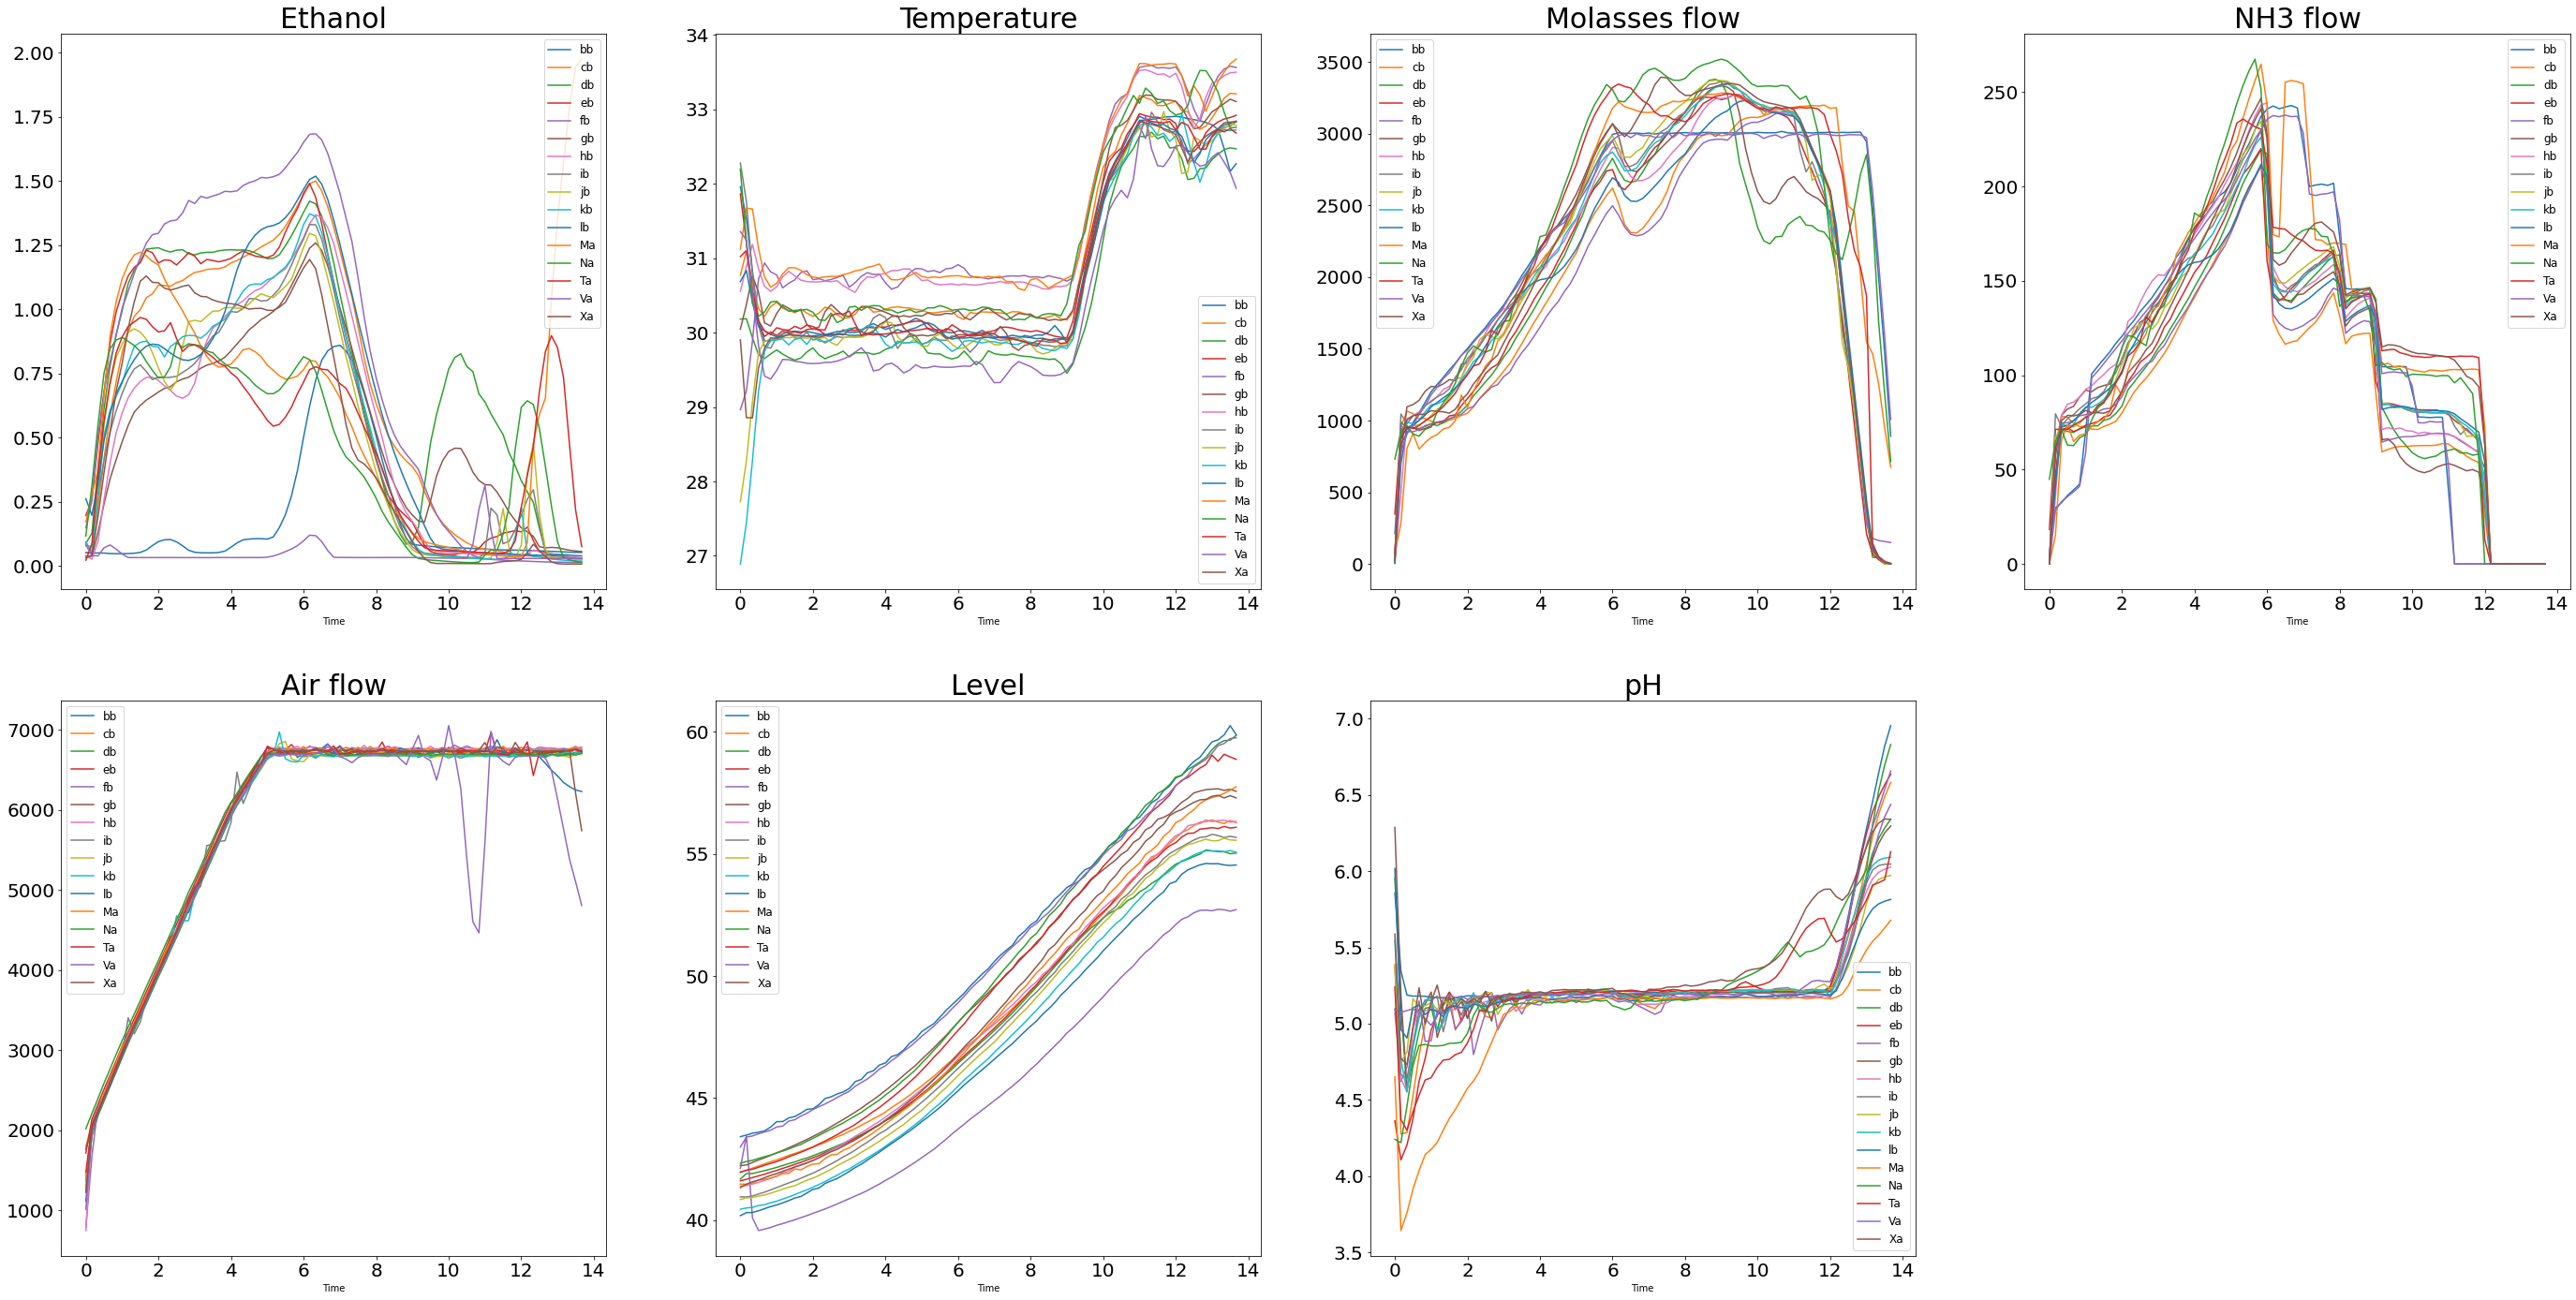

In [9]:
variables_name = df.columns[4:]
plt.figure(figsize=(48,24))
for i in range(len(variables_name)):
    plt.subplot(2,4,i+1)
    for id in type:
        var = df[df.BatchID==id]
        plt.plot(var['Time'],var[variables_name[i]],label=id)
        plt.xlabel('Time')
        plt.title(variables_name[i],fontsize=30)
        plt.xticks(fontsize=20)
        plt.yticks(fontsize=20)
        plt.legend(fontsize=12)

For outliers, va batch is an outlier in Air flow. And 'va', 'lb' are outliers in 'Ethonal'.
'Ethanol' has the largest variability since it is not stable and flutuates along the time. And Air flow and PH are tightly controlled.

Q2.1.3

In [12]:
baker_df = df.drop(columns = ['Unnamed: 0', 'Primary ID', 'BatchID'])
scaler = StandardScaler()
baker_scaled = scaler.fit_transform(baker_df)
pca = PCA(n_components=5)
pca_scores = pca.fit_transform(baker_scaled)
scores_pd = pd.DataFrame(data=pca_scores, columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5'], index = baker_df.index)
loadings_pd = pd.DataFrame(data = pca.components_.T, columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5'], index = baker_df.columns)

array([0.52860131, 0.25607245, 0.10375975, 0.06428613, 0.02353388])

In [13]:
scores_pd

,PC1,PC2,PC3,PC4,PC5
0,-0.808176,4.508288,-0.200368,1.295502,-0.754945
1,-1.303347,3.391210,0.824346,0.666865,-0.552935
2,-1.630004,3.073121,1.085677,0.706676,-0.168488
3,-1.790453,2.816650,1.059588,0.979711,0.160562
4,-1.811100,2.636318,1.033483,1.094550,0.294213
...,...,...,...,...,...
1323,3.772295,2.368292,-1.644665,0.830572,-0.163892
1324,3.875235,2.595895,-1.942104,0.980115,-0.265168
1325,3.963794,2.665704,-2.074648,1.041445,-0.323446
1326,3.900935,2.872436,-2.046092,1.108283,-0.312934


In [14]:
loadings_pd

,PC1,PC2,PC3,PC4,PC5
Time,0.471425,-0.115005,-0.073487,-0.109928,0.166210
Ethanol,-0.315056,-0.164245,-0.630171,-0.587107,0.255200
Temperature,0.399243,0.203158,0.051128,-0.540846,-0.647797
Molasses flow,0.127401,-0.608623,0.366748,-0.045936,0.239382
NH3 flow,-0.254209,-0.542698,-0.115348,0.249949,-0.618487
Air flow,0.318021,-0.481637,-0.256120,-0.079962,-0.044048
Level,0.472402,-0.064508,0.060503,-0.001973,0.210803
pH,0.337563,0.132078,-0.614657,0.528890,-0.037395


In [15]:
scores_pd['Time'] = df['Time']
scores_pd['BatchID'] = df['BatchID']
scores_pivot = pd.pivot_table(scores_pd,values=['PC1', 'PC2', 'PC3','PC4','PC5'],index='Time',columns='BatchID')
scores_pivot

PC1                                                    \
BatchID          Ma        Na        Ta        Va        Xa        bb   
Time                                                                    
0.000000  -2.575226 -2.494768 -1.834810 -1.935067 -1.953438 -0.808176   
0.166667  -3.406333 -2.944182 -2.731785 -1.704701 -3.044833 -1.303347   
0.333333  -3.390333 -3.070940 -3.117042 -1.841620 -3.172201 -1.630004   
0.500000  -3.534499 -2.888284 -3.194946 -2.016330 -2.751431 -1.790453   
0.666667  -3.596972 -2.732277 -3.165646 -2.107667 -2.436144 -1.811100   
...             ...       ...       ...       ...       ...       ...   
13.000000  2.489762  4.277071  3.184812  4.033208  3.772295  4.373225   
13.166700  2.481818  4.552587  3.157697  4.097282  3.875235  4.485736   
13.333300  2.421492  4.641010  3.372776  4.055942  3.963794  4.556764   
13.500000  2.397535  4.702980  3.579729  4.048033  3.900935  4.617689   
13.666700  2.442108  4.826890  3.850841  3.985137  3.808085  4.695344   

                                                   ...       PC5            \
BatchID          cb        db        eb        fb  ...        cb        db   
Time                                               ...                       
0.000000  -1.732160 -1.483465 -2.607604 -2.574646  ... -0.132314  0.132039   
0.166667  -2.818163 -2.245863 -3.134312 -3.146375  ... -0.526101  0.060107   
0.333333  -3.018590 -3.095891 -3.340362 -3.181104  ... -0.346720  0.127723   
0.500000  -2.938017 -3.043336 -3.349177 -2.775636  ... -0.083581  0.355656   
0.666667  -2.735993 -2.909978 -3.199772 -2.511582  ...  0.060130  0.456512   
...             ...       ...       ...       ...  ...       ...       ...   
13.000000  3.610527  3.231240  3.730375  3.293611  ... -0.289543 -0.039956   
13.166700  3.812695  3.385515  3.900761  3.531415  ... -0.436381 -0.158290   
13.333300  4.008694  3.523197  4.035689  3.730366  ... -0.528557 -0.196414   
13.500000  4.187002  3.613033  4.143437  3.877819  ... -0.574028 -0.223224   
13.666700  4.289330  3.696612  4.246451  3.984240  ... -0.582936 -0.218157   

                                                                       \
BatchID          eb        fb        gb        hb        ib        jb   
Time                                                                    
0.000000  -0.617059  0.897800  0.128482  0.009076 -0.914290  1.438659   
0.166667  -0.570277  0.552050 -0.165896 -0.371143 -1.111206  0.774914   
0.333333  -0.087732  0.075650 -0.462843 -0.755104 -0.431340  0.456887   
0.500000   0.197882 -0.306487 -0.344080 -0.594513 -0.052315  0.199308   
0.666667   0.370031 -0.384769 -0.106633 -0.404393  0.123296  0.218693   
...             ...       ...       ...       ...       ...       ...   
13.000000 -0.292699 -0.656136 -0.236875 -0.491489 -0.158960 -0.126855   
13.166700 -0.372398 -0.775162 -0.341100 -0.588635 -0.269508 -0.242682   
13.333300 -0.404784 -0.839552 -0.399807 -0.637534 -0.309537 -0.286531   
13.500000 -0.430634 -0.870686 -0.438777 -0.664983 -0.323551 -0.338967   
13.666700 -0.446849 -0.863928 -0.430286 -0.667053 -0.351098 -0.322251   

                               
BatchID          kb        lb  
Time                           
0.000000   1.833015 -0.111854  
0.166667   1.236314 -0.332924  
0.333333   0.850361 -0.270976  
0.500000   0.471139 -0.038183  
0.666667   0.224946  0.038438  
...             ...       ...  
13.000000 -0.147775 -0.175886  
13.166700 -0.292980 -0.289735  
13.333300 -0.326307 -0.334636  
13.500000 -0.322784 -0.355440  
13.666700 -0.327004 -0.367125  

[83 rows x 80 columns]

In [16]:
def myplot(scores,loadings,loading_labels=None,score_labels=None):
    # adjusting the scores to fit in (-1,1)
    xt = scores[:,0]
    yt = scores[:,1]
    n = loadings.shape[0]
    scalext = 1.0/(xt.max() - xt.min())
    scaleyt = 1.0/(yt.max() - yt.min())
    xt_scaled = xt * scalext
    yt_scaled = yt * scaleyt
    # adjusting the loadings to fit in (-1,1)
    p = loadings
    p_scaled = MaxAbsScaler().fit_transform(p)

    for i in range(16):
        plt.plot(xt_scaled[i*83: (i+1)*83], yt_scaled[i*83: (i+1)*83])
    
    for i in range(n):
        plt.arrow(0, 0, p_scaled[i,0], p_scaled[i,1], color = 'r',alpha = 0.5)
        if loading_labels is None:
            plt.text(p_scaled[i,0], p_scaled[i,1], "Var"+str(i+1), color = 'g', ha = 'center', va = 'center')
        else:
            plt.text(p_scaled[i,0], p_scaled[i,1], loading_labels[i], color = 'r', ha = 'center', va = 'center', size=16)
    plt.xlim(-1,1)
    plt.ylim(-1,1)
    plt.xlabel("PC{}".format(1), fontsize=20);
    plt.ylabel("PC{}".format(2), fontsize=20);
    plt.tick_params(labelsize=16)
    plt.grid()

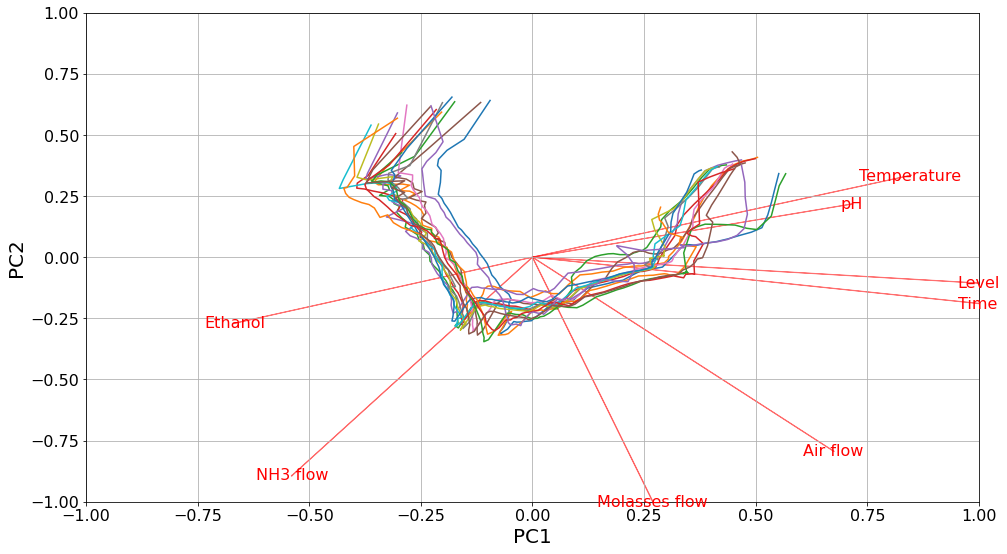

In [10]:
plt.rcParams["figure.figsize"] = [16,9]

myplot(pca_scores[:,:2],loadings_pd.iloc[:,:2],loading_labels=loadings_pd.index,score_labels=scores_pd.index)
plt.show()

Q2.1.6

The batches start at the second quarter and end at the first quarter. The kink happens at the third quarter while some variables change and others are not fluctuating. 'Molasses flow' and 'Air flow' do not change in the first phase. 'Ethanol', 'NH3 flow', 'Temperature' and 'PH' do not change in the second phase.

Q2.1.7

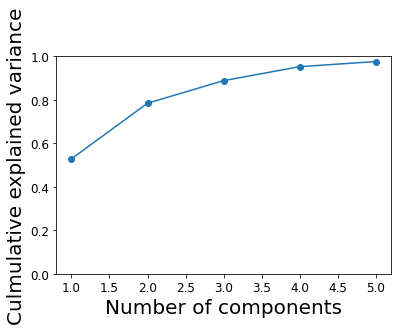

In [17]:
plt.plot(range(1, pca.n_components+1), np.cumsum(pca.explained_variance_ratio_), '-o', label = 'Cumulative explained variance')
plt.xlabel('Number of components', fontsize = 20)
plt.ylabel('Culmulative explained variance', fontsize = 20)
plt.tick_params(labelsize=12)
plt.ylim(0,1)
plt.show()

In [18]:
print("The percent of variances that the first 2 principal components captured is", np.cumsum(pca.explained_variance_ratio_)[1]) 

The percent of variances that the first 2 principal components captured is 0.7846737653782888


## 2.2

Q2.2.1

In [19]:
baker_df1 = pd.read_excel('todays_batches.xlsx')

In [20]:
baker_df2 = baker_df1.drop(columns = ['Unnamed: 0', 'Primary ID', 'BatchID'])
baker_scaled2 = scaler.transform(baker_df2) 
pca_scores1 = pca.transform(baker_scaled2)
scores_pd1 = pd.DataFrame(data=pca_scores1, columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5'], index = baker_df2.index)
loadings_pd1 = pd.DataFrame(data = pca.components_.T, columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5'], index = baker_df2.columns)

In [21]:
scores_pd1

,PC1,PC2,PC3,PC4,PC5
0,-3.096781,3.798958,1.166746,0.602916,0.937231
1,-3.715861,3.216763,2.529801,-1.183846,0.839431
2,-3.928722,2.972255,1.411527,-2.217525,1.037556
3,-4.362027,1.145315,-0.230988,-2.807162,1.130690
4,-4.476710,1.268811,-2.409623,-3.259502,1.559791
...,...,...,...,...,...
161,4.177559,2.589581,-2.097027,0.924135,-0.524341
162,4.329929,2.726441,-2.361650,1.062921,-0.615614
163,4.401519,2.857172,-2.506579,1.158278,-0.667658
164,4.462603,2.853649,-2.596933,1.205385,-0.682489


In [22]:
loadings_pd1

,PC1,PC2,PC3,PC4,PC5
Time,0.471425,-0.115005,-0.073487,-0.109928,0.166210
Ethanol,-0.315056,-0.164245,-0.630171,-0.587107,0.255200
Temperature,0.399243,0.203158,0.051128,-0.540846,-0.647797
Molasses flow,0.127401,-0.608623,0.366748,-0.045936,0.239382
NH3 flow,-0.254209,-0.542698,-0.115348,0.249949,-0.618487
Air flow,0.318021,-0.481637,-0.256120,-0.079962,-0.044048
Level,0.472402,-0.064508,0.060503,-0.001973,0.210803
pH,0.337563,0.132078,-0.614657,0.528890,-0.037395


In [29]:
scores_pd1['Time'] = baker_df1['Time']
scores_pd1['BatchID'] = baker_df1['BatchID']
scores_pivot1 = pd.pivot_table(scores_pd1,values=[ 'PC1', 'PC2', 'PC3', 'PC4', 'PC5'],index='Time',columns='BatchID')
scores_pivot1

PC1                 PC2                 PC3            \
BatchID          Ya        Za        Ya        Za        Ya        Za   
Time                                                                    
0.000000  -3.096781 -0.660359  3.798958  4.613764  1.166746 -1.802298   
0.166667  -3.715861 -2.032155  3.216763  2.849667  2.529801  0.423385   
0.333333  -3.928722 -2.734359  2.972255  2.229773  1.411527  1.511814   
0.500000  -4.362027 -2.523621  1.145315  2.247428 -0.230988  0.916732   
0.666667  -4.476710 -2.356751  1.268811  2.592231 -2.409623  0.100159   
...             ...       ...       ...       ...       ...       ...   
13.000000  1.684309  4.177559  1.398034  2.589581 -1.259476 -2.097027   
13.166700  1.770673  4.329929  1.426290  2.726441 -1.244740 -2.361650   
13.333300  1.869276  4.401519  1.470466  2.857172 -1.198562 -2.506579   
13.500000  1.932977  4.462603  1.699221  2.853649 -1.276991 -2.596933   
13.666700  1.646827  4.510675  2.394997  2.868612 -1.234926 -2.633580   

                PC4                 PC5            
BatchID          Ya        Za        Ya        Za  
Time                                               
0.000000   0.602916  2.854773  0.937231 -0.030840  
0.166667  -1.183846  1.492080  0.839431  0.011713  
0.333333  -2.217525 -0.031252  1.037556 -0.072634  
0.500000  -2.807162 -0.437946  1.130690 -0.224712  
0.666667  -3.259502 -0.325745  1.559791 -0.049787  
...             ...       ...       ...       ...  
13.000000 -2.095856  0.924135  0.405520 -0.524341  
13.166700 -1.915758  1.062921  0.421113 -0.615614  
13.333300 -1.773398  1.158278  0.404415 -0.667658  
13.500000 -1.577216  1.205385  0.316969 -0.682489  
13.666700 -1.173403  1.236215  0.343897 -0.672140  

[83 rows x 10 columns]

Q2.2.2

In [27]:
def myplot(scores1,scores2,loadings,loading_labels=None,score_labels=None):
    # adjusting the scores to fit in (-1,1)
    xt1 = scores1[:,0]
    yt1 = scores1[:,1]
    n = loadings.shape[0]
    scalext1 = 1.0/(xt1.max() - xt1.min())
    scaleyt1 = 1.0/(yt1.max() - yt1.min())
    xt1_scaled = xt1 * scalext1
    yt1_scaled = yt1 * scaleyt1

    xt2 = scores2[:,0]
    yt2 = scores2[:,1]
    scalext2 = 1.0/(xt2.max() - xt2.min())
    scaleyt2 = 1.0/(yt2.max() - yt2.min())
    xt2_scaled = xt2 * scalext2
    yt2_scaled = yt2 * scaleyt2

    # adjusting the loadings to fit in (-1,1)
    p = loadings
    p_scaled = MaxAbsScaler().fit_transform(p)
    
    for i in range(16):
        plt.plot(xt1_scaled[i*83: (i+1)*83], yt1_scaled[i*83: (i+1)*83])

    for i in range(2):
        plt.plot(xt2_scaled[i*83: (i+1)*83], yt2_scaled[i*83: (i+1)*83], linestyle='-.',label = score_labels[i])
        plt.legend()

    for i in range(n):
        plt.arrow(0, 0, p_scaled[i,0], p_scaled[i,1], color = 'r',alpha = 0.5)
        if loading_labels is None:
            plt.text(p_scaled[i,0], p_scaled[i,1], "Var"+str(i+1), color = 'g', ha = 'center', va = 'center')
        else:
            plt.text(p_scaled[i,0], p_scaled[i,1], loading_labels[i], color = 'r', ha = 'center', va = 'center', size=16)
    plt.xlim(-1,1)
    plt.ylim(-1,1)
    plt.xlabel("PC{}".format(1), fontsize=20);
    plt.ylabel("PC{}".format(2), fontsize=20);
    plt.tick_params(labelsize=16)
    plt.grid()

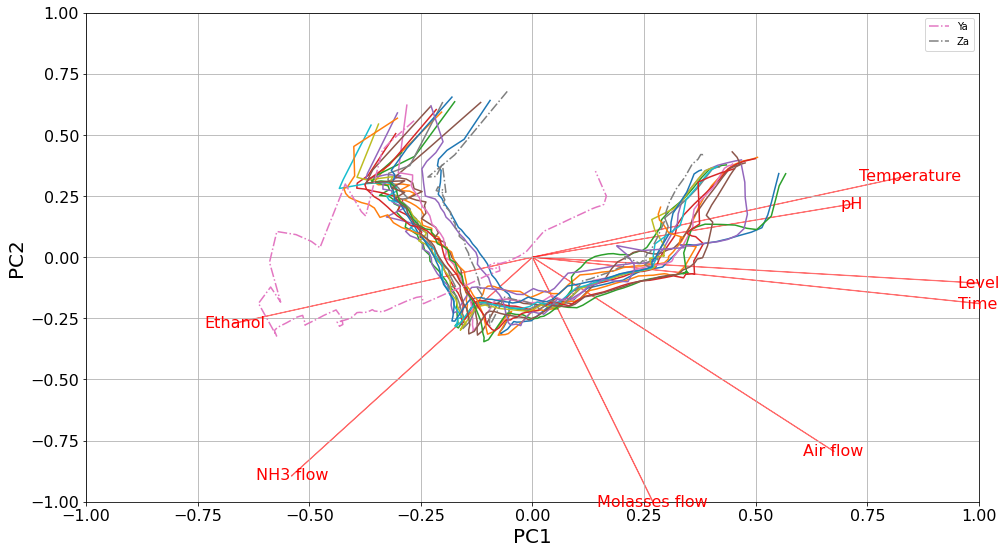

In [25]:
plt.rcParams["figure.figsize"] = [16,9]

myplot(pca_scores[:,:2],pca_scores1[:,:2],loadings_pd1.iloc[:,:2],loading_labels=loadings_pd1.index,score_labels=baker_df1['BatchID'].unique())
plt.legend()
plt.show()

Q2.2.2

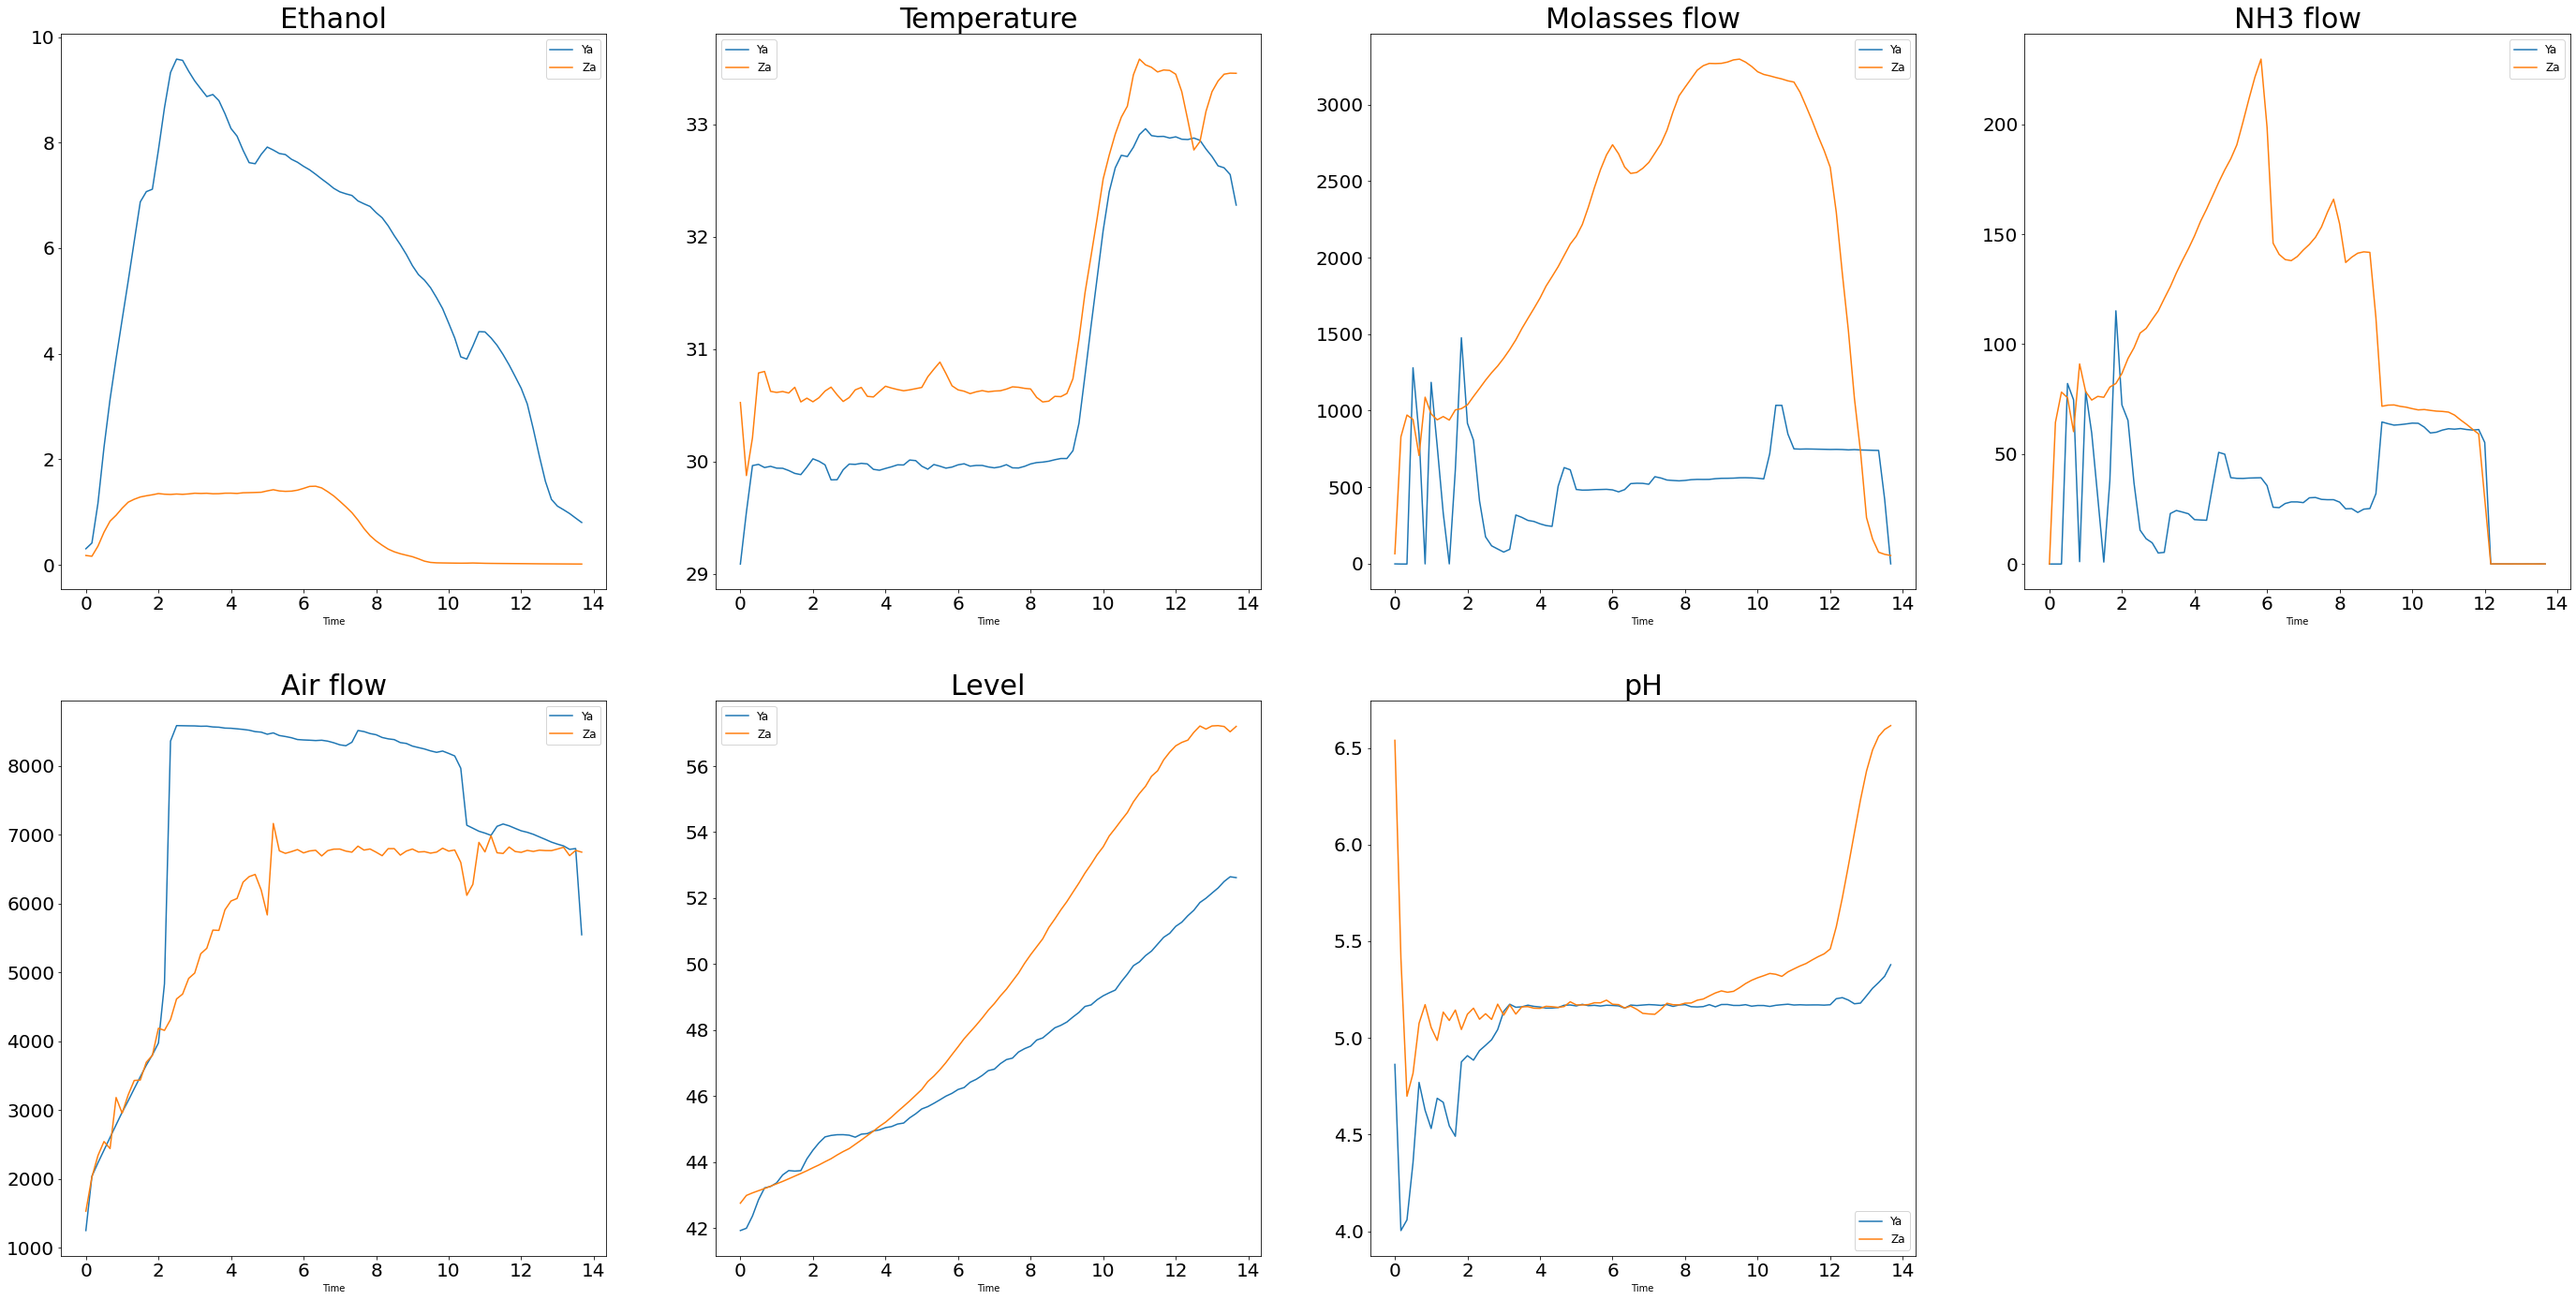

In [26]:
type = list(baker_df1['BatchID'].unique())
baker_df2 = baker_df1.columns[4:]
plt.figure(figsize=(48,24))
for i in range(len(baker_df2)):
    plt.subplot(2,4,i+1)
    for id in type:
        var = baker_df1[baker_df1.BatchID==id]
        plt.plot(var['Time'],var[baker_df2[i]],label=id)
        plt.xlabel('Time')
        plt.title(baker_df2[i],fontsize=30)
        plt.xticks(fontsize=20)
        plt.yticks(fontsize=20)
        plt.legend(fontsize=12)

Q2.2.3

Batch Za shows the similar behaviour to that of the reference ones since we could clear see line batch Za follows the scores-loading pattern.
Batch Ya deviates the reference ones since batch Ya has higher Ethanoal and lower Molasses flow and NH3 flow which we could refer from the scores-loading plot and time series plot.
